In [1]:
#https://github.com/benmiroglio/pymatch
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
raw_data = pd.read_csv('AI_psm.csv')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 29 columns):
order_id             5524 non-null int64
duty                 5524 non-null int64
driver_id            5524 non-null int64
product_id           5524 non-null int64
city_id              5524 non-null int64
normal_distance      5524 non-null float64
a_birth_time         5524 non-null object
normal_time          5524 non-null int64
gmv                  5524 non-null float64
is_anycar            5524 non-null int64
work_time            5524 non-null object
team_id              5524 non-null int64
biz_status           5524 non-null int64
sp_flag              5524 non-null int64
is_valid             5524 non-null int64
driver_grade         5524 non-null int64
avg_d_order          5483 non-null float64
avg_d_jiejia         5483 non-null float64
avg_d_five_star      5483 non-null float64
avg_d_becompliant    5483 non-null float64
avg_d_compliant      5483 non-null float64
avg_d_pic       

In [4]:
raw_data.head(5)

,order_id,duty,driver_id,product_id,city_id,normal_distance,a_birth_time,normal_time,gmv,is_anycar,...,avg_d_becompliant,avg_d_compliant,avg_d_pic,first_uid,second_uid,apr_uid,dif_birth_time,dif_work_time,Unnamed: 27,Unnamed: 28
0,17619635403306,1,565344622611133,3,23,7.8,2018/12/27 13:49,19,23.89,0,...,0.095238,0.142857,0.0,NaN,NaN,735964.0,18.423009,1004.486655,NaN,NaN
1,17619704195577,1,567950046657114,3,38,10.6,2018/12/28 11:20,25,29.62,0,...,0.000000,0.000000,0.0,NaN,NaN,736082.0,17.526678,577.639317,NaN,NaN
2,17619723260462,1,565166575723727,3,5,26.1,2018/12/28 15:44,29,83.28,0,...,0.125000,0.437500,0.0,NaN,NaN,736078.0,17.343461,1037.505764,NaN,NaN
3,17619850411547,1,566254575813493,3,5,5.4,2018/12/29 21:28,9,16.32,0,...,0.083333,0.000000,0.0,NaN,NaN,735964.0,16.104780,896.999306,NaN,NaN
4,17619889628531,1,580542268307790,3,23,8.9,2018/12/30 11:00,21,26.87,0,...,0.043478,0.000000,0.0,178882.0,173830.0,NaN,15.540405,418.110382,NaN,NaN


In [66]:
raw_data.duty.value_counts()

0    5009
1     515
Name: duty, dtype: int64

In [5]:
data = raw_data.copy()

In [6]:
data['os_type'] = data['apr_uid'].apply(lambda x: 'old_sys' if pd.isnull(x) else 'new_sys')

In [7]:
data.avg_d_pic.value_counts()

0.0    5483
Name: avg_d_pic, dtype: int64

In [8]:
bid_index = data[data['apr_uid'].isnull()].index
for i in bid_index:
    data['apr_uid'][i] = data['second_uid'][i]

In [9]:
r = []
for i in data.columns:
    if len(data[i].value_counts())<=1:
        r.append(i)
r

['avg_d_order', 'avg_d_jiejia', 'avg_d_pic', 'Unnamed: 27', 'Unnamed: 28']

In [10]:
cols_to_drop = ['a_birth_time',
                'normal_time',
                'work_time',
                'first_uid',
                'second_uid',
                'avg_d_order',
                'avg_d_jiejia',
                'avg_d_pic',
                'Unnamed: 27',
                'Unnamed: 28']
data = data.drop(cols_to_drop,axis=1)


In [11]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    
    # make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns ={0: 'Missing Value', 1: '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print('Your selected dataframe has ' + str(df.shape[1]) + " columns.\n"
          'There are ' + str(mis_val_table_ren_columns.shape[0]) +
         " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(data)

Your selected dataframe has 20 columns.
There are 4 columns that have missing values.


,Missing Value,% of Total Values
apr_uid,222,4.0
avg_d_five_star,41,0.7
avg_d_becompliant,41,0.7
avg_d_compliant,41,0.7


In [12]:
data['apr_uid'] = data['apr_uid'].fillna(0)

In [13]:
data = data.fillna(data.mean())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 20 columns):
order_id             5524 non-null int64
duty                 5524 non-null int64
driver_id            5524 non-null int64
product_id           5524 non-null int64
city_id              5524 non-null int64
normal_distance      5524 non-null float64
gmv                  5524 non-null float64
is_anycar            5524 non-null int64
team_id              5524 non-null int64
biz_status           5524 non-null int64
sp_flag              5524 non-null int64
is_valid             5524 non-null int64
driver_grade         5524 non-null int64
avg_d_five_star      5524 non-null float64
avg_d_becompliant    5524 non-null float64
avg_d_compliant      5524 non-null float64
apr_uid              5524 non-null float64
dif_birth_time       5524 non-null float64
dif_work_time        5524 non-null float64
os_type              5524 non-null object
dtypes: float64(8), int64(11), object(1)
memory usage: 8

In [15]:
cat_cols = ['duty',
            'product_id',
            'city_id',
            'is_anycar',
            'team_id',
            'biz_status',
            'sp_flag',
            'is_valid',
            'driver_grade',
            'apr_uid',
            'os_type']

for col in cat_cols:
    data[col] = data[col].astype('object')

In [16]:
data['order_id'] = data['order_id'].astype('float64')
data['driver_id'] = data['driver_id'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 20 columns):
order_id             5524 non-null float64
duty                 5524 non-null object
driver_id            5524 non-null float64
product_id           5524 non-null object
city_id              5524 non-null object
normal_distance      5524 non-null float64
gmv                  5524 non-null float64
is_anycar            5524 non-null object
team_id              5524 non-null object
biz_status           5524 non-null object
sp_flag              5524 non-null object
is_valid             5524 non-null object
driver_grade         5524 non-null object
avg_d_five_star      5524 non-null float64
avg_d_becompliant    5524 non-null float64
avg_d_compliant      5524 non-null float64
apr_uid              5524 non-null object
dif_birth_time       5524 non-null float64
dif_work_time        5524 non-null float64
os_type              5524 non-null object
dtypes: float64(9), object(11)
memory usage:

In [17]:
data_clean = data.copy()
data_clean.to_csv('ai_psm_data.csv')

In [28]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 20 columns):
order_id             5524 non-null float64
duty                 5524 non-null object
driver_id            5524 non-null float64
product_id           5524 non-null object
city_id              5524 non-null object
normal_distance      5524 non-null float64
gmv                  5524 non-null float64
is_anycar            5524 non-null object
team_id              5524 non-null object
biz_status           5524 non-null object
sp_flag              5524 non-null object
is_valid             5524 non-null object
driver_grade         5524 non-null object
avg_d_five_star      5524 non-null float64
avg_d_becompliant    5524 non-null float64
avg_d_compliant      5524 non-null float64
apr_uid              5524 non-null object
dif_birth_time       5524 non-null float64
dif_work_time        5524 non-null float64
os_type              5524 non-null object
dtypes: float64(9), object(11)
memory usage:

In [43]:
j = []
for i in data.columns:
    if len(data[i].value_counts()) <= data[i].shape[0]*0.85:
        j.append(i)
j

['order_id', 'dif_birth_time']

In [46]:
data.biz_status.value_counts()

1    5512
8       5
2       5
7       2
Name: biz_status, dtype: int64

In [51]:
data.sp_flag.value_counts()

1    5509
0      15
Name: sp_flag, dtype: int64

In [52]:
data.is_anycar.value_counts()

0    5296
1     228
Name: is_anycar, dtype: int64

In [19]:
test = data_clean[data_clean.duty==1]
control = data_clean[data_clean.duty==0]

In [55]:
m = Matcher(test,control,yvar="duty",exclude=['order_id','driver_id','biz_status','sp_flag'])

Formula:
duty ~ product_id+city_id+normal_distance+gmv+is_anycar+team_id+is_valid+driver_grade+avg_d_five_star+avg_d_becompliant+avg_d_compliant+apr_uid+dif_birth_time+dif_work_time+os_type
n majority: 5009
n minority: 515


In [56]:
np.random.seed(1234)
m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 66.71%


In [57]:
m.predict_scores()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


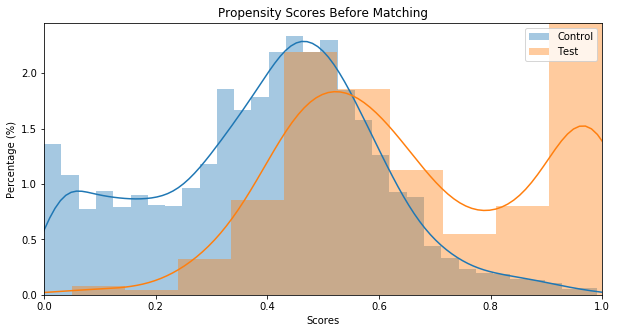

In [59]:
m.plot_scores()

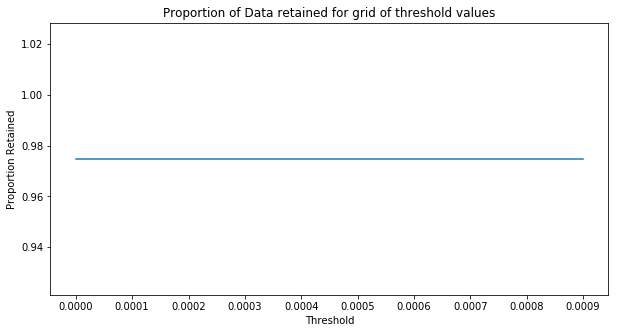

In [60]:
m.tune_threshold(method='random')

In [74]:
m.match(method='min',nmatches=1,threshold=0.0001)

In [75]:
m.record_frequency()

,freq,n_records
0,1,525
1,2,9
2,3,7
3,4,10
4,5,8
5,6,5
6,7,5
7,8,2
8,9,6
9,10,4


In [76]:
m.assign_weight_vector()

In [77]:
m.matched_data.sort_values("match_id").head(20)

,record_id,weight,order_id,duty,driver_id,product_id,city_id,normal_distance,gmv,is_anycar,...,driver_grade,avg_d_five_star,avg_d_becompliant,avg_d_compliant,apr_uid,dif_birth_time,dif_work_time,os_type,scores,match_id
0,0,1.000000,1.761964e+13,1,5.653446e+14,3,23,7.8,23.89,0,...,6,2.333333,0.095238,0.142857,735964,18.423009,1004.486655,new_sys,0.45,0
550,1115,0.083333,1.762020e+13,0,5.631300e+14,3,2,5.8,20.32,0,...,6,2.047619,0.047619,0.047619,734380,12.494294,1397.168194,new_sys,0.45,0
1,1,1.000000,1.761970e+13,1,5.679500e+14,3,38,10.6,29.62,0,...,6,2.238095,0.000000,0.000000,736082,17.526678,577.639317,new_sys,0.43,1
857,3216,0.142857,1.762095e+13,0,5.679502e+14,3,23,2.2,9.00,0,...,6,2.041667,0.166667,0.000000,736076,3.264051,598.565185,new_sys,0.43,1
2,2,1.000000,1.761972e+13,1,5.651666e+14,3,5,26.1,83.28,0,...,6,1.062500,0.125000,0.437500,736078,17.343461,1037.505764,new_sys,0.41,2
652,1877,0.111111,1.762046e+13,0,5.805424e+14,3,11,5.7,17.85,0,...,6,1.789474,0.000000,0.000000,735958,9.369248,249.226377,new_sys,0.41,2
3,3,1.000000,1.761985e+13,1,5.662546e+14,3,5,5.4,16.32,0,...,7,2.500000,0.083333,0.000000,735964,16.104780,896.999306,new_sys,0.61,3
950,4236,0.142857,3.519303e+13,0,5.659889e+14,3,21,4.4,13.63,0,...,6,2.550000,0.000000,0.000000,736074,11.438021,523.207477,new_sys,0.61,3
807,3185,0.020408,1.762094e+13,0,5.679502e+14,3,5,21.4,73.96,0,...,6,2.227273,0.045455,0.045455,739932,3.359664,388.395938,new_sys,0.99,4
4,4,1.000000,1.761989e+13,1,5.805423e+14,3,23,8.9,26.87,0,...,6,2.695652,0.043478,0.000000,173830,15.540405,418.110382,old_sys,0.99,4


In [65]:
m.matched_data.shape

(1030, 24)

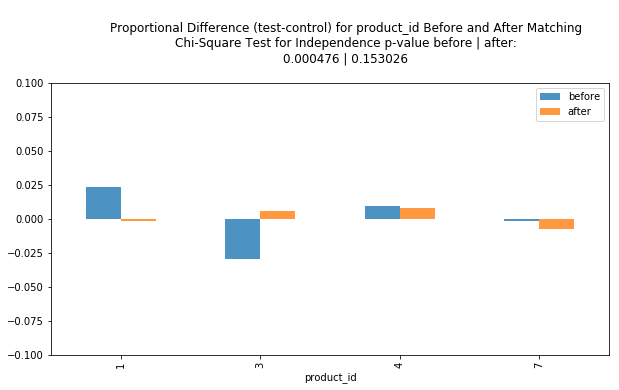

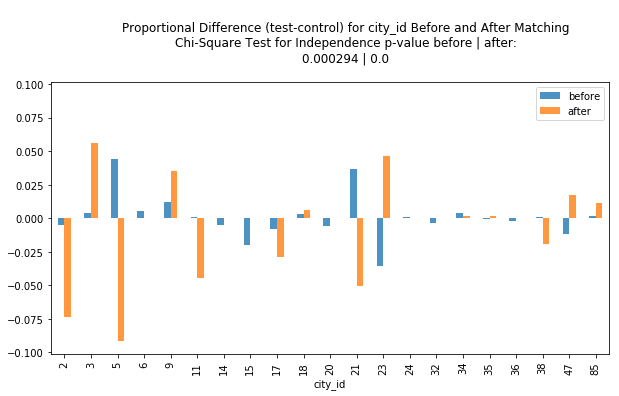

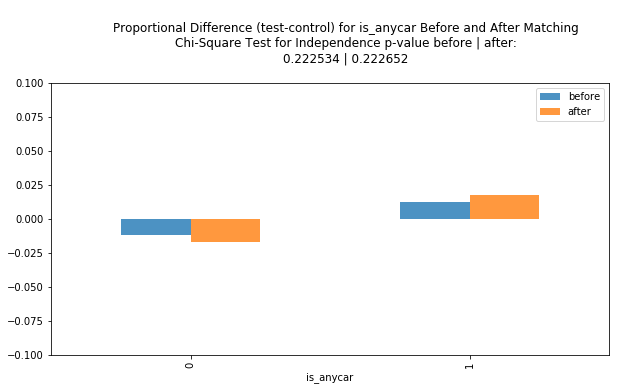

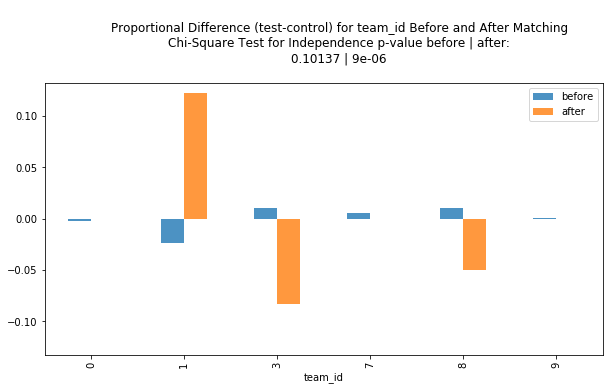

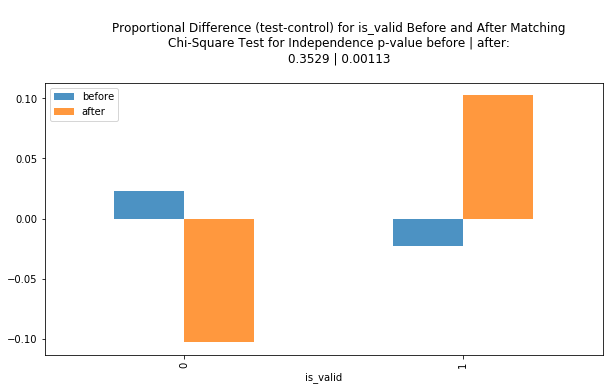

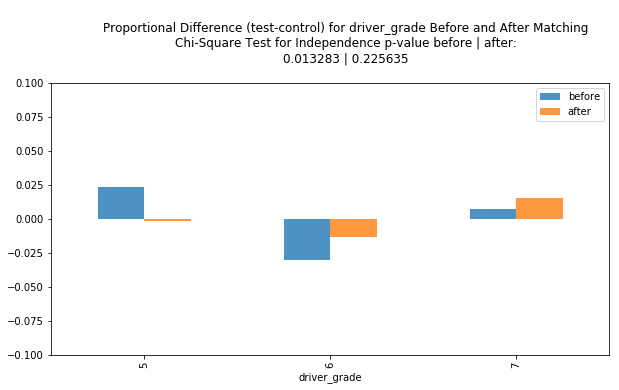

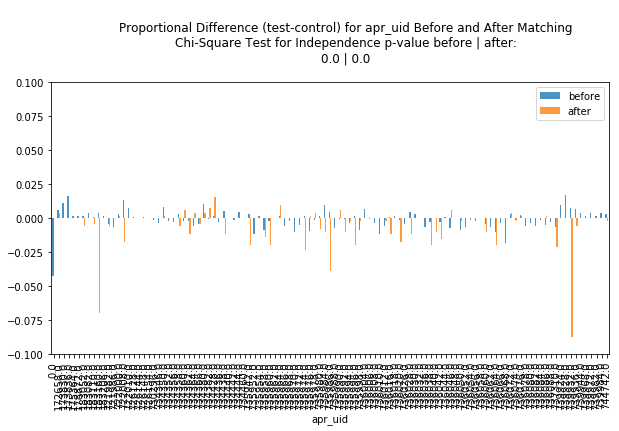

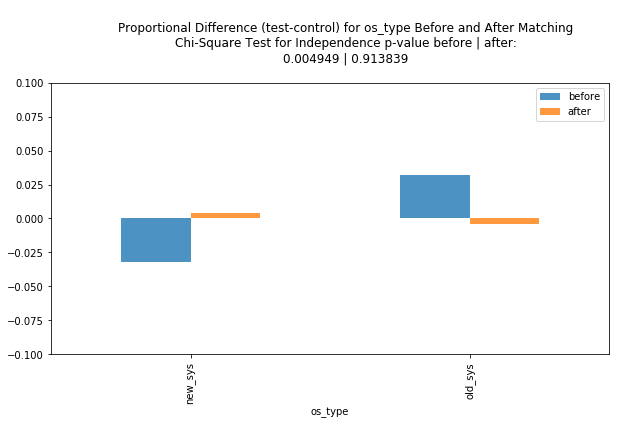

In [78]:
categorical_results = m.compare_categorical(return_table=True)

In [79]:
categorical_results

,var,before,after
0,product_id,0.000476,0.153026
1,city_id,0.000294,0.000000
2,is_anycar,0.222534,0.222652
3,team_id,0.101370,0.000009
4,is_valid,0.352900,0.001130
5,driver_grade,0.013283,0.225635
6,apr_uid,0.000000,0.000000
7,os_type,0.004949,0.913839


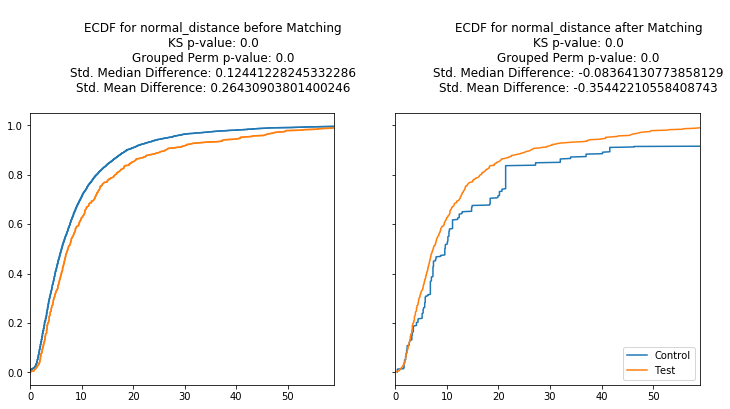

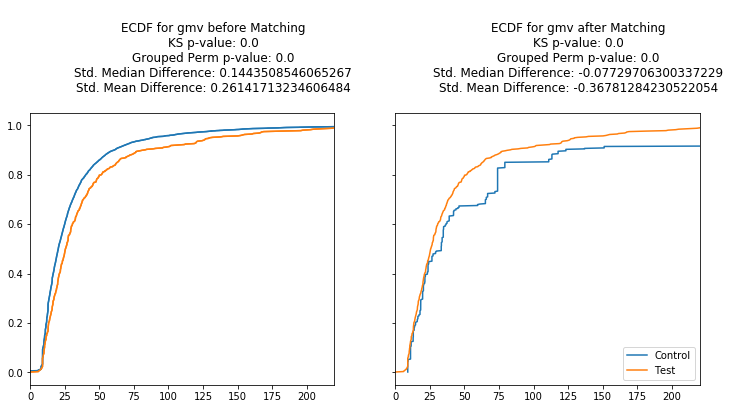

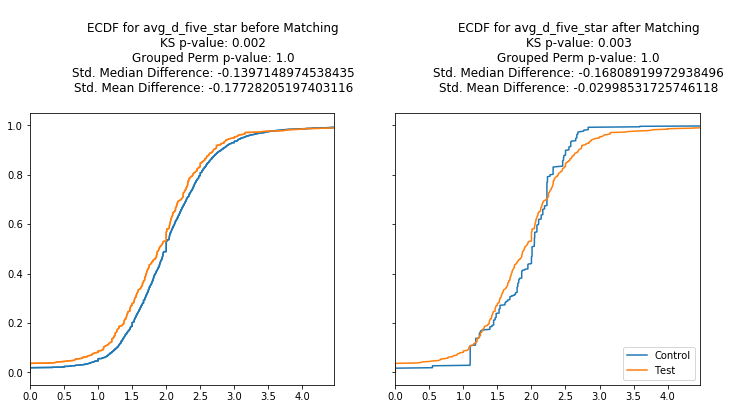

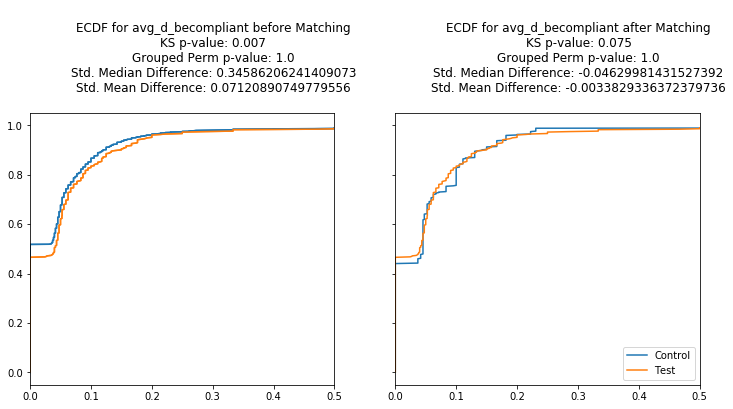

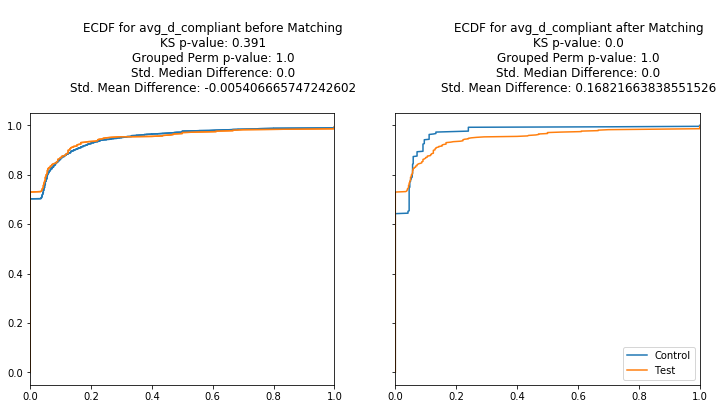

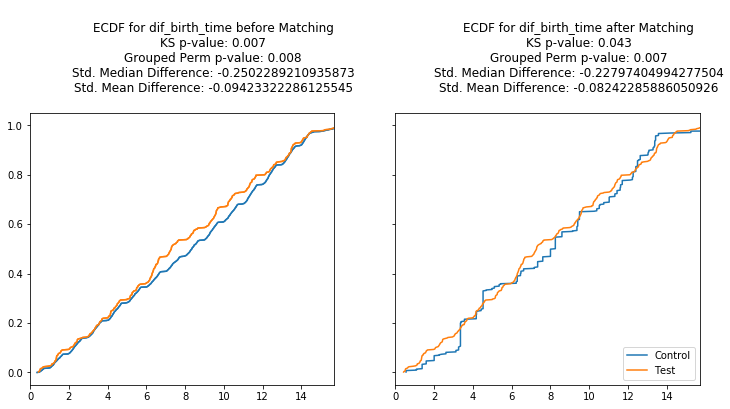

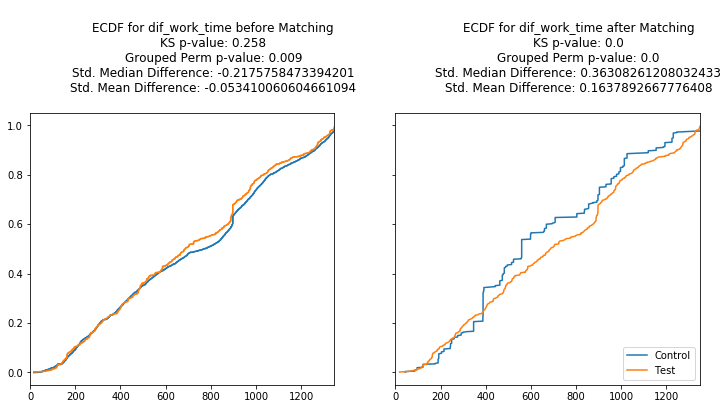

In [80]:
cc = m.compare_continuous(return_table=True)